In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False


In [52]:
# 1. 데이터 로드
# 구별 화재 통계
fire_data = pd.read_csv('./results/구별_건물특성_화재통계.csv')

# 건축 연대별 데이터 (1989년 이전 건축물 개수)
building_data = pd.read_csv('./results/building_year_by_gu.csv')

# 필요한 컬럼 확인
print("=== 화재 통계 데이터 ===")
print(fire_data.head())
print(f"\n컬럼: {fire_data.columns.tolist()}")

print("\n=== 건축 연대 데이터 ===")
print(building_data.head())
print(f"\n컬럼: {building_data.columns.tolist()}")


=== 화재 통계 데이터 ===
  SGG_NM  화재건수  노후건물비율(%)      평균층수      평균면적(m²)            인구수  화재율(1만명당)
0    강남구   422   0.710900  7.515244  76520.875000  655545.114288   6.437391
1    강동구   171   1.754386  6.500000   8950.015873  509888.837375   3.353672
2    강북구   200   0.000000  4.924051   2247.943038  287913.541725   6.946530
3    강서구   274   0.000000  7.604762   9249.166667  526891.403000   5.200313
4    관악구   281   0.711744  5.097345   1795.407080  450404.012013   6.238843

컬럼: ['SGG_NM', '화재건수', '노후건물비율(%)', '평균층수', '평균면적(m²)', '인구수', '화재율(1만명당)']

=== 건축 연대 데이터 ===
     구  1989년이전건물수   전체건물수  1989년이전비율(%)
0  강남구       76010  384437         19.77
1  강동구       39658  310620         12.77
2  강북구       29360  203587         14.42
3  강서구       19112  408707          4.68
4  관악구       29330  261974         11.20

컬럼: ['구', '1989년이전건물수', '전체건물수', '1989년이전비율(%)']


In [53]:
# 2. 데이터 병합
# 구 이름 정렬 및 병합
fire_data_sorted = fire_data[fire_data['SGG_NM'] != '소계'].copy()
fire_data_sorted = fire_data_sorted.rename(columns={'SGG_NM': '구'})

building_data_sorted = building_data[building_data['구'] != '소계'].copy()

# 구 기준으로 병합
merged_data = pd.merge(fire_data_sorted, building_data_sorted, on='구', how='inner')

print("=== 병합된 데이터 ===")
print(merged_data[['구', '화재율(1만명당)', '1989년이전건물수', '1989년이전비율(%)']])
print(f"\n병합된 구 수: {len(merged_data)}")


=== 병합된 데이터 ===
       구  화재율(1만명당)  1989년이전건물수  1989년이전비율(%)
0    강남구   6.437391       76010         19.77
1    강동구   3.353672       39658         12.77
2    강북구   6.946530       29360         14.42
3    강서구   5.200313       19112          4.68
4    관악구   6.238843       29330         11.20
5    광진구   5.459436       27776         14.52
6    구로구   5.343869       45056         16.33
7    금천구   9.916710       21870         15.05
8    노원구   3.998253      126722         32.86
9    도봉구   6.510259       46048         21.00
10  동대문구   4.821495       31604         14.27
11   동작구   4.664169       25164         10.40
12   마포구   6.497976       28904         11.17
13  서대문구   6.428533       31120         14.64
14   서초구   5.129029       39020         14.50
15   성동구   6.449753       24266         13.30
16   성북구   6.113877       33038         11.49
17   송파구   5.188692       85068         19.09
18   양천구   4.388839       84488         28.61
19  영등포구   8.041673       51842         22.54
20   용산구   8.29946

In [54]:
# 3. 상관관계 분석
from scipy import stats

# 필요한 변수 추출
fire_rate = merged_data['화재율(1만명당)'].values
building_pre1989 = merged_data['1989년이전건물수'].values
building_pre1989_pct = merged_data['1989년이전비율(%)'].values

# Pearson 상관계수 (개수)
pearson_r1, pearson_p1 = stats.pearsonr(fire_rate, building_pre1989)

# Pearson 상관계수 (비율)
pearson_r2, pearson_p2 = stats.pearsonr(fire_rate, building_pre1989_pct)

# Spearman 상관계수 (개수)
spearman_r1, spearman_p1 = stats.spearmanr(fire_rate, building_pre1989)

# Spearman 상관계수 (비율)
spearman_r2, spearman_p2 = stats.spearmanr(fire_rate, building_pre1989_pct)

# 결과 출력
print("=" * 80)
print("상관관계 분석: 화재율(1만명당) vs 1989년 이전 건축물")
print("=" * 80)

print("\n[1] 1989년 이전 건축물 개수 vs 화재율")
print(f"  - Pearson 상관계수: {pearson_r1:.4f}")
print(f"    p-value: {pearson_p1:.4f} {'(유의함 ***)' if pearson_p1 < 0.001 else '(유의함 **)' if pearson_p1 < 0.01 else '(유의함 *)' if pearson_p1 < 0.05 else '(유의하지 않음)'}")
print(f"  - Spearman 상관계수: {spearman_r1:.4f}")
print(f"    p-value: {spearman_p1:.4f} {'(유의함 ***)' if spearman_p1 < 0.001 else '(유의함 **)' if spearman_p1 < 0.01 else '(유의함 *)' if spearman_p1 < 0.05 else '(유의하지 않음)'}")

print("\n[2] 1989년 이전 건축물 비율(%) vs 화재율")
print(f"  - Pearson 상관계수: {pearson_r2:.4f}")
print(f"    p-value: {pearson_p2:.4f} {'(유의함 ***)' if pearson_p2 < 0.001 else '(유의함 **)' if pearson_p2 < 0.01 else '(유의함 *)' if pearson_p2 < 0.05 else '(유의하지 않음)'}")
print(f"  - Spearman 상관계수: {spearman_r2:.4f}")
print(f"    p-value: {spearman_p2:.4f} {'(유의함 ***)' if spearman_p2 < 0.001 else '(유의함 **)' if spearman_p2 < 0.01 else '(유의함 *)' if spearman_p2 < 0.05 else '(유의하지 않음)'}")

print("\n" + "=" * 80)
print("해석:")
print("=" * 80)
if pearson_r2 > 0 and pearson_p2 < 0.05:
    print("✓ 1989년 이전 건축물 비율이 높을수록 화재율이 높은 경향을 보입니다 (양의 상관관계)")
elif pearson_r2 < 0 and pearson_p2 < 0.05:
    print("✗ 1989년 이전 건축물 비율이 높을수록 화재율이 낮은 경향을 보입니다 (음의 상관관계)")
else:
    print("- 통계적으로 유의한 상관관계가 없습니다")
print("=" * 80)


상관관계 분석: 화재율(1만명당) vs 1989년 이전 건축물

[1] 1989년 이전 건축물 개수 vs 화재율
  - Pearson 상관계수: -0.3588
    p-value: 0.0781 (유의하지 않음)
  - Spearman 상관계수: -0.3185
    p-value: 0.1208 (유의하지 않음)

[2] 1989년 이전 건축물 비율(%) vs 화재율
  - Pearson 상관계수: 0.1292
    p-value: 0.5381 (유의하지 않음)
  - Spearman 상관계수: 0.2531
    p-value: 0.2222 (유의하지 않음)

해석:
- 통계적으로 유의한 상관관계가 없습니다


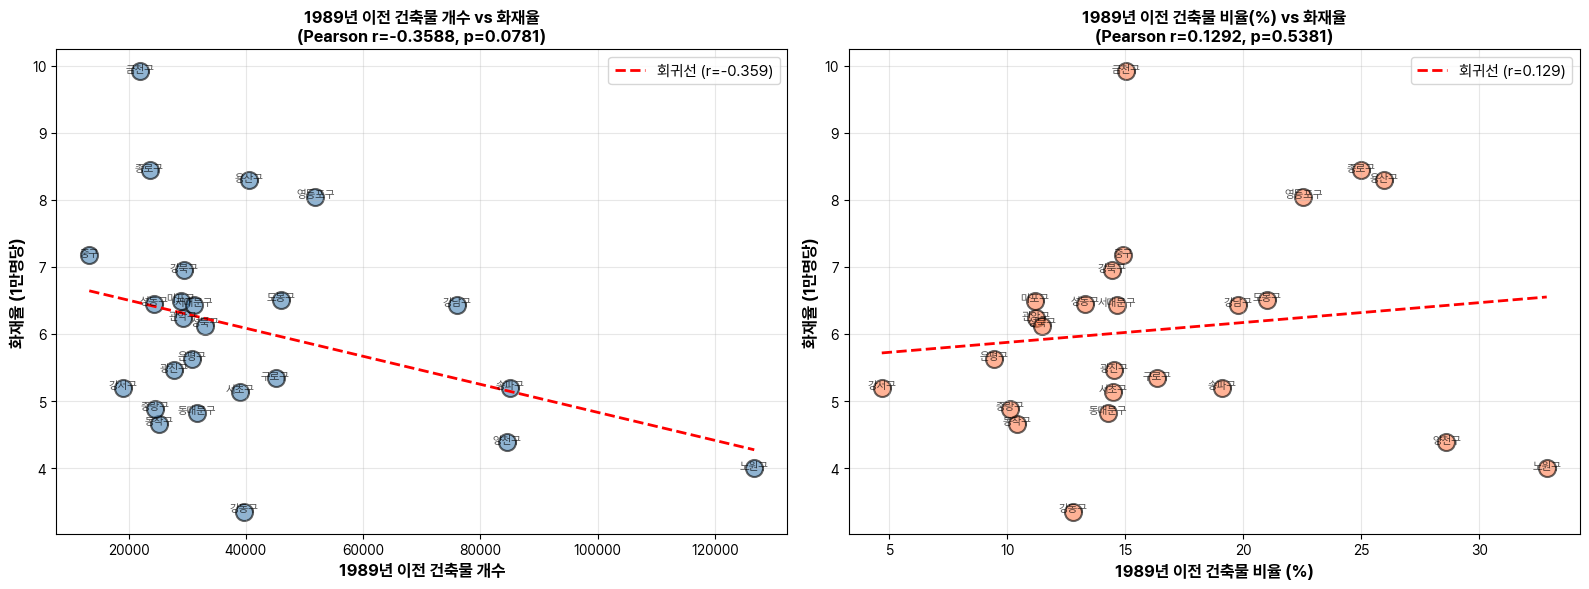

✓ 산점도 저장: ./results/building_fire_correlation.png


In [55]:
# 4. 시각화: 산점도 - 1989년 이전 건축물 개수 vs 화재율
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 4-1. 1989년 이전 건축물 개수 vs 화재율
ax1 = axes[0]
ax1.scatter(building_pre1989, fire_rate, s=150, alpha=0.6, color='steelblue', edgecolors='black', linewidth=1.5)

# 회귀선 추가
coeffs = np.polyfit(building_pre1989, fire_rate, 1)
poly = np.poly1d(coeffs)
x_line1 = np.linspace(building_pre1989.min(), building_pre1989.max(), 100)
ax1.plot(x_line1, poly(x_line1), "r--", linewidth=2, label=f'회귀선 (r={pearson_r1:.3f})')

# 구 이름 표시
for idx, row in merged_data.iterrows():
    ax1.annotate(row['구'], (row['1989년이전건물수'], row['화재율(1만명당)']), 
                fontsize=8, alpha=0.7, ha='center')

ax1.set_xlabel('1989년 이전 건축물 개수', fontsize=12, fontweight='bold')
ax1.set_ylabel('화재율 (1만명당)', fontsize=12, fontweight='bold')
ax1.set_title(f'1989년 이전 건축물 개수 vs 화재율\n(Pearson r={pearson_r1:.4f}, p={pearson_p1:.4f})', 
             fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)

# 4-2. 1989년 이전 건축물 비율(%) vs 화재율
ax2 = axes[1]
ax2.scatter(building_pre1989_pct, fire_rate, s=150, alpha=0.6, color='coral', edgecolors='black', linewidth=1.5)

# 회귀선 추가
coeffs2 = np.polyfit(building_pre1989_pct, fire_rate, 1)
poly2 = np.poly1d(coeffs2)
x_line2 = np.linspace(building_pre1989_pct.min(), building_pre1989_pct.max(), 100)
ax2.plot(x_line2, poly2(x_line2), "r--", linewidth=2, label=f'회귀선 (r={pearson_r2:.3f})')

# 구 이름 표시
for idx, row in merged_data.iterrows():
    ax2.annotate(row['구'], (row['1989년이전비율(%)'], row['화재율(1만명당)']), 
                fontsize=8, alpha=0.7, ha='center')

ax2.set_xlabel('1989년 이전 건축물 비율 (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('화재율 (1만명당)', fontsize=12, fontweight='bold')
ax2.set_title(f'1989년 이전 건축물 비율(%) vs 화재율\n(Pearson r={pearson_r2:.4f}, p={pearson_p2:.4f})', 
             fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

plt.tight_layout()
plt.savefig('./results/building_fire_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 산점도 저장: ./results/building_fire_correlation.png")


In [56]:
df = pd.read_csv('./data/LOCAL_PEOPLE_GU_2023/LOCAL_PEOPLE_GU_2023.csv', encoding = 'euc-kr')
df.head()

,기준일ID,시간대구분,자치구코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20230101,0,11110,211983.7554,5256.3035,2985.2135,5585.3388,10029.3603,10311.7458,8131.2590,...,9989.7436,7420.0172,7877.9124,7403.7900,8433.4562,7401.3378,7984.9511,6476.2241,5176.6241,14109.9869
1,20230101,0,11140,161323.9236,5093.4474,1916.9721,2969.1968,6355.1874,7354.2686,6991.7530,...,8413.7271,6993.0188,7613.7788,5851.6730,5895.7675,5054.8313,5262.5790,4762.5191,3330.8358,9806.8907
2,20230101,0,11170,254936.4270,7214.2899,3557.2729,5090.9204,8721.3070,11030.7512,12265.7970,...,11856.9406,11857.7227,13386.7419,10292.2066,10609.6364,9299.7363,8951.3212,7662.5905,5762.7546,15375.7578
3,20230101,0,11200,303352.3618,10735.8404,4511.9900,6409.0787,9987.8283,12091.6443,11337.1432,...,12123.5732,12338.8198,15555.4774,12236.0617,12272.9808,11141.5024,11594.7859,9793.4866,7480.2283,19484.7348
4,20230101,0,11215,359375.3891,10808.4535,5769.8457,10861.3001,15557.6316,16801.7747,14391.7039,...,17918.7066,14837.4148,15334.9660,13328.4735,14172.6260,12648.3202,13913.7108,11250.0675,8604.0436,19799.9595


In [57]:
# 5. 자치구 코드 매핑
# guCode.csv 로드 (구 이름과 코드 대응)
gu_code = pd.read_csv('./data/guCode.csv')
gu_code_dict = dict(zip(gu_code['구명'], gu_code['코드']))

print("=" * 80)
print("자치구 코드 매핑")
print("=" * 80)
print(gu_code.to_string(index=False))
print("\n")

# merged_data에 구 코드 추가
merged_data['구코드'] = merged_data['구'].map(gu_code_dict)

# 상관관계 분석 결과 + 구 코드 표시
print("=" * 80)
print("구별 화재율과 건축물 정보 (구 코드 포함)")
print("=" * 80)
print(merged_data[['구', '구코드', '화재율(1만명당)', '1989년이전건물수', '1989년이전비율(%)']].to_string(index=False))
print("\n")

# 주요 지표별 구 순위
print("=" * 80)
print("화재율 상위 5개 구 (1만명당)")
print("=" * 80)
top_fire = merged_data.nlargest(5, '화재율(1만명당)')[['구', '구코드', '화재율(1만명당)', '1989년이전비율(%)']]
print(top_fire.to_string(index=False))

print("\n" + "=" * 80)
print("1989년 이전 건축물 비율 상위 5개 구")
print("=" * 80)
top_old = merged_data.nlargest(5, '1989년이전비율(%)')[['구', '구코드', '1989년이전비율(%)', '화재율(1만명당)']]
print(top_old.to_string(index=False))


자치구 코드 매핑
  구명    코드
 종로구 11110
  중구 11140
 용산구 11170
 성동구 11200
 광진구 11215
동대문구 11230
 중랑구 11260
 성북구 11290
 강북구 11305
 도봉구 11320
 노원구 11350
 은평구 11380
서대문구 11410
 마포구 11440
 양천구 11470
 강서구 11500
 구로구 11530
 금천구 11545
영등포구 11560
 동작구 11590
 관악구 11620
 서초구 11650
 강남구 11680
 송파구 11710
 강동구 11740


구별 화재율과 건축물 정보 (구 코드 포함)
   구   구코드  화재율(1만명당)  1989년이전건물수  1989년이전비율(%)
 강남구 11680   6.437391       76010         19.77
 강동구 11740   3.353672       39658         12.77
 강북구 11305   6.946530       29360         14.42
 강서구 11500   5.200313       19112          4.68
 관악구 11620   6.238843       29330         11.20
 광진구 11215   5.459436       27776         14.52
 구로구 11530   5.343869       45056         16.33
 금천구 11545   9.916710       21870         15.05
 노원구 11350   3.998253      126722         32.86
 도봉구 11320   6.510259       46048         21.00
동대문구 11230   4.821495       31604         14.27
 동작구 11590   4.664169       25164         10.40
 마포구 11440   6.497976       28904         11.17
서대문구 

In [58]:
# 6. 나이대 그룹화: 0~19,20~39,40~54,55~
import re

print("=== df 컬럼 목록 ===")
print(df.columns.tolist())

# 시도1: 단일 나이(연령) 컬럼 찾기
age_col = None
candidates = ['나이','age','연령','연령(세)','연령(만)','AGE']
for c in df.columns:
    if c in candidates or c.lower() in [x.lower() for x in candidates]:
        age_col = c
        break

# 추가 탐색: 컬럼명에 '연령' 또는 'age' 포함 여부
if not age_col:
    for c in df.columns:
        if '연령' in c or 'age' in c.lower() or '나이' in c:
            age_col = c
            break

if age_col:
    print(f"단일 연령 컬럼 발견: {age_col} -> 그룹화 적용")
    df['age_numeric'] = pd.to_numeric(df[age_col], errors='coerce')
    def map_age_group(a):
        if pd.isna(a):
            return 'unknown'
        a = int(a)
        if a <= 19:
            return '미성년자'
        elif a <= 39:
            return '청년'
        elif a <= 54:
            return '중년'
        else:
            return '장년'
    df['age_group'] = df['age_numeric'].apply(map_age_group)
    print('\n=== age_group 분포 ===')
    print(df['age_group'].value_counts(dropna=False))
    print('\n=== 샘플 ===')
    display(df[[age_col,'age_numeric','age_group']].head(10))
else:
    # 시도2: 연령대 브래킷(예: '0~9', '10~19' 같은 컬럼)이 있는지 탐색
    bracket_cols = [c for c in df.columns if re.match(r"^\s*\d{1,3}\s*[-~]", c) or re.search(r"\d{1,3}\s*세", c)]
    if bracket_cols:
        print("연령대 브래킷 컬럼들 발견:", bracket_cols)
        # 브래킷 컬럼들을 미성년자/청년/중년/장년으로 합산
        groups = { '미성년자': [], '청년': [], '중년': [], '장년': [] }
        def parse_bounds(col):
            m = re.search(r"(\d{1,3})\s*[-~]\s*(\d{1,3})", col)
            if m:
                return int(m.group(1)), int(m.group(2))
            m2 = re.search(r"(\d{1,3})\s*세", col)
            if m2:
                x = int(m2.group(1))
                return x, x
            return None
        for col in bracket_cols:
            bounds = parse_bounds(col)
            if not bounds:
                continue
            lo, hi = bounds
            if hi <= 19:
                groups['미성년자'].append(col)
            elif lo >= 55:
                groups['장년'].append(col)
            elif lo >= 40:
                groups['중년'].append(col)
            else:
                groups['청년'].append(col)
        # 합산
        for g, cols in groups.items():
            if cols:
                df[g] = df[cols].apply(pd.to_numeric, errors='coerce').sum(axis=1)
            else:
                df[g] = 0
        # 각 행에서 가장 큰 그룹을 age_group으로 지정
        df['age_group'] = df[['미성년자','청년','중년','장년']].idxmax(axis=1)
        print('\n=== age_group 분포 (브래킷 합산 기준) ===')
        print(df['age_group'].value_counts(dropna=False))
        print('\n=== 샘플 ===')
        display(df[['미성년자','청년','중년','장년','age_group']].head(10))
    else:
        print('나이 관련 컬럼을 찾지 못했습니다. df.columns 목록을 확인하고 어떤 컬럼을 기준으로 그룹화할지 알려주세요.')

print('\n(다음 단계: 필요하면 `age_group` 기준으로 구별 합계나 시각화를 추가할 수 있습니다.)')


=== df 컬럼 목록 ===
['기준일ID', '시간대구분', '자치구코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수', '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수', '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수', '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수', '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수', '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수', '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수', '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수', '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수']
연령대 브래킷 컬럼들 발견: ['남자0세부터9세생활인구수', '남자10세부터14세생활인구수', '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수', '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수', '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수', '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수', '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수', '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수', '여자40세부터44세생활인

,미성년자,청년,중년,장년,age_group
0,27628.3348,74855.4709,48118.0473,61381.8982,청년
1,19564.0941,61030.3325,37076.3827,43653.1175,청년
2,32186.4149,92231.0441,62817.4877,67701.4784,청년
3,43669.0658,100581.4934,72681.7985,86420.0031,청년
4,54010.9597,129364.6070,80093.4628,95906.3623,청년
5,45207.4921,110744.3182,74312.7118,99369.0994,청년
6,52645.2285,105369.4721,86267.9477,125252.0681,장년
7,72064.8749,123067.1653,101252.0519,125680.3528,장년
8,42768.3931,82346.8140,71203.7917,108574.8772,장년
9,42292.3944,70344.2667,65410.4727,102626.7992,장년



(다음 단계: 필요하면 `age_group` 기준으로 구별 합계나 시각화를 추가할 수 있습니다.)


In [59]:
ageGroupDf = df[['기준일ID','시간대구분','자치구코드','미성년자','청년','중년','장년','총생활인구수']]

In [60]:
gu_code_dict
code_to_gu = {y: x for x, y in gu_code_dict.items()}
code_to_gu

{11110: '종로구',
 11140: '중구',
 11170: '용산구',
 11200: '성동구',
 11215: '광진구',
 11230: '동대문구',
 11260: '중랑구',
 11290: '성북구',
 11305: '강북구',
 11320: '도봉구',
 11350: '노원구',
 11380: '은평구',
 11410: '서대문구',
 11440: '마포구',
 11470: '양천구',
 11500: '강서구',
 11530: '구로구',
 11545: '금천구',
 11560: '영등포구',
 11590: '동작구',
 11620: '관악구',
 11650: '서초구',
 11680: '강남구',
 11710: '송파구',
 11740: '강동구'}

In [61]:
ageGroupDf['자치구'] = ageGroupDf['자치구코드'].map(code_to_gu)

C:\TempFolder\ipykernel_9480\592665182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageGroupDf['자치구'] = ageGroupDf['자치구코드'].map(code_to_gu)


In [68]:
df_ageFilter = ageGroupDf[(ageGroupDf['기준일ID'] == 20231231) & (ageGroupDf['시간대구분']==0)]

In [73]:
population_df = df_ageFilter[['자치구','미성년자','청년','중년','장년','총생활인구수']].reset_index()

In [75]:
population_df = population_df[['자치구','미성년자','청년','중년','장년','총생활인구수']]

In [76]:
population_df.to_csv('./results/Local_Population.csv', encoding = 'euc-kr')

In [78]:
pst_pop_df = pd.DataFrame()
pst_pop_df = population_df[['자치구','총생활인구수']].copy()

In [ ]:
pst_pop_df['청년비율'] = 